# Single Digit Classifer

Image classifier that can recognize single 28 x 28 bw digits. Trained on the MNIST database.

In [1]:
from fastai.vision.all import *

## Creating the Path to MNIST

In [2]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

## Creating the DataBlock

In [3]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW),
                          CategoryBlock),
                  get_items = get_image_files,
                  splitter = GrandparentSplitter(train_name='training',
                                                 valid_name='testing'),
                  get_y = parent_label)

## Creating the DataLoaders

In [4]:
dls = mnist.dataloaders(path)
#dls.show_batch(max_n=9, figsize=(4,4))

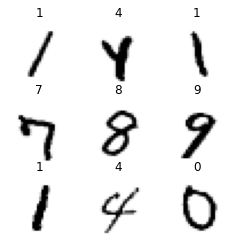

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

## Creating the Learner

In [48]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

## Begin training the model

In [50]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.625466,0.403713,0.128100,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.113744,0.076388,0.025800,01:08
1,0.078190,0.047016,0.014700,01:09
2,0.044977,0.033711,0.010300,01:10
3,0.032437,0.023196,0.006500,01:10
4,0.012323,0.020426,0.005700,01:09
5,0.006724,0.020279,0.005700,01:09


## Graph the loss

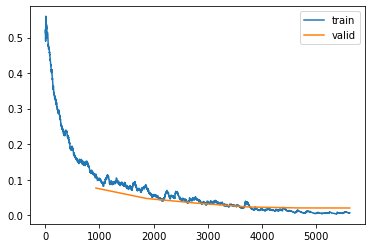

In [51]:
learn.recorder.plot_loss()

## Export the model

In [53]:
learn.export('digit.pkl')